In [96]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV

In [54]:
df = pd.read_csv('/content/heart.csv')

In [55]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [56]:
x, y = df.drop('target', axis=1), df['target']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=9)

**Scale-Insensitive**

In [57]:
forest = RandomForestClassifier()
forest.fit(x_train, y_train)

RandomForestClassifier()

In [58]:
nb_clf = GaussianNB()
nb_clf.fit(x_train, y_train)

GaussianNB()

In [59]:
gb_clf = GradientBoostingClassifier()
gb_clf.fit(x_train, y_train)

GradientBoostingClassifier()

**Scale-Sensitive**

In [60]:
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [61]:
log = LogisticRegression()
log.fit(x_train_scaled, y_train)

LogisticRegression()

In [62]:
knn = KNeighborsClassifier()
knn.fit(x_train_scaled, y_train)

KNeighborsClassifier()

In [63]:
svc = SVC()
svc.fit(x_train_scaled, y_train)

SVC()

In [64]:
forest.score(x_test, y_test)

0.9853658536585366

In [65]:
nb_clf.score(x_test, y_test)

0.8463414634146341

In [66]:
gb_clf.score(x_test, y_test)

0.9707317073170731

In [67]:
knn.score(x_test_scaled, y_test)

0.8536585365853658

In [68]:
log.score(x_test_scaled, y_test)

0.8731707317073171

In [69]:
svc.score(x_test_scaled, y_test)

0.9341463414634147

In [70]:
y_preds = forest.predict(x_test)
print('Forest:', recall_score(y_test, y_preds))

y_preds = nb_clf.predict(x_test)
print('NB:', recall_score(y_test, y_preds))

y_preds = gb_clf.predict(x_test)
print('GB:', recall_score(y_test, y_preds))

y_preds = knn.predict(x_test_scaled)
print('KNN:', recall_score(y_test, y_preds))

y_preds = log.predict(x_test_scaled)
print('LOG:', recall_score(y_test, y_preds))

y_preds = svc.predict(x_test_scaled)
print('SVC:', recall_score(y_test, y_preds))

Forest: 0.9859154929577465
NB: 0.9014084507042254
GB: 0.9859154929577465
KNN: 0.8732394366197183
LOG: 0.92018779342723
SVC: 0.9530516431924883


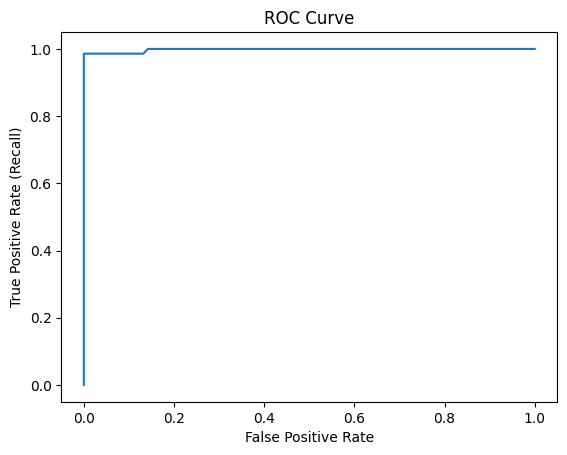

In [71]:
y_probs = forest.predict_proba(x_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_probs)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


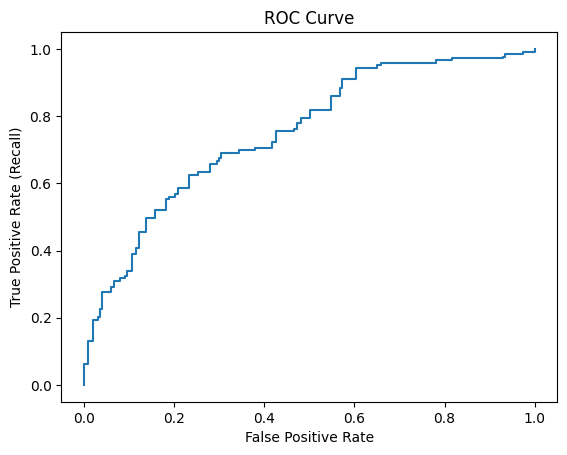

In [72]:
y_probs_log = log.predict_proba(x_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_probs_log)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve')
plt.show()

In [73]:
roc_auc_score(y_test, y_probs)

0.9980696360906556

In [74]:
roc_auc_score(y_test, y_probs_log)

0.7505064226305378

**Hyperparameter Tuning**

In [86]:
param_grid = {
    'n_estimators': [100, 200, 500, 600, 700],
    # 'max_depth': [None, 10, 20 , 30],
    # 'min_samples_split': [2, 5, 10],
    # 'min_samples_leaf': [1, 2, 4],
    # 'max_features': ['sqrt', 'log2', None]
}

forest = RandomForestClassifier(n_jobs=-1, random_state=9)
grid_search = GridSearchCV(forest, param_grid, cv=3, n_jobs=-1, verbose=2)

In [87]:
grid_search.fit(x_train, y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(n_jobs=-1, random_state=9),
             n_jobs=-1, param_grid={'n_estimators': [100, 200, 500, 600, 700]},
             verbose=2)

In [88]:
best_forest = grid_search.best_estimator_

In [89]:
best_forest

RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=9)

In [99]:
best_forest.score(x_test, y_test)

0.9853658536585366

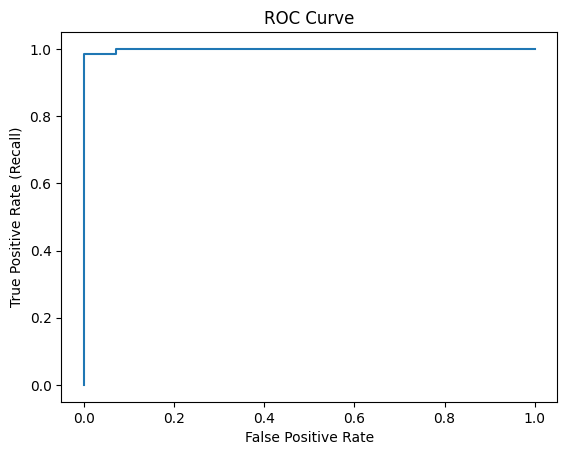

In [100]:
y_probs = best_forest.predict_proba(x_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_probs)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve')
plt.show()

In [101]:
y_preds = best_forest.predict(x_test)
print('Forest:', recall_score(y_test, y_preds))

Forest: 0.9859154929577465


**Featutre Importances**

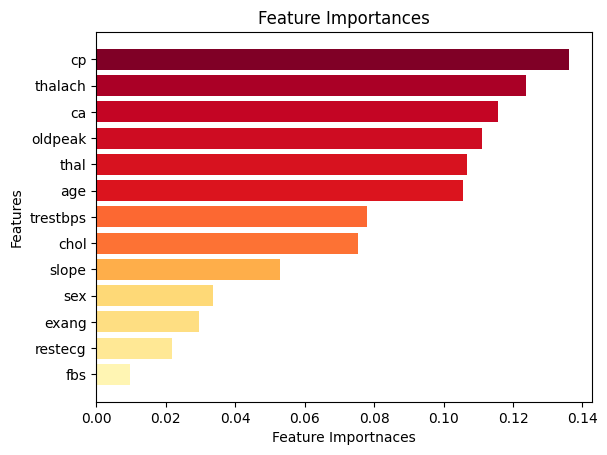

In [93]:
feature_importances = best_forest.feature_importances_
features = best_forest.feature_names_in_

sorted_idx = np.argsort(feature_importances)
sorted_features = features[sorted_idx]
sorted_importances = feature_importances[sorted_idx]

colors = plt.cm.YlOrRd(sorted_importances / max(sorted_importances))

plt.barh(sorted_features, sorted_importances, color=colors)
plt.xlabel('Feature Importnaces')
plt.ylabel('Features')
plt.title('Feature Importances')
plt.show()

In [94]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


<Axes: >

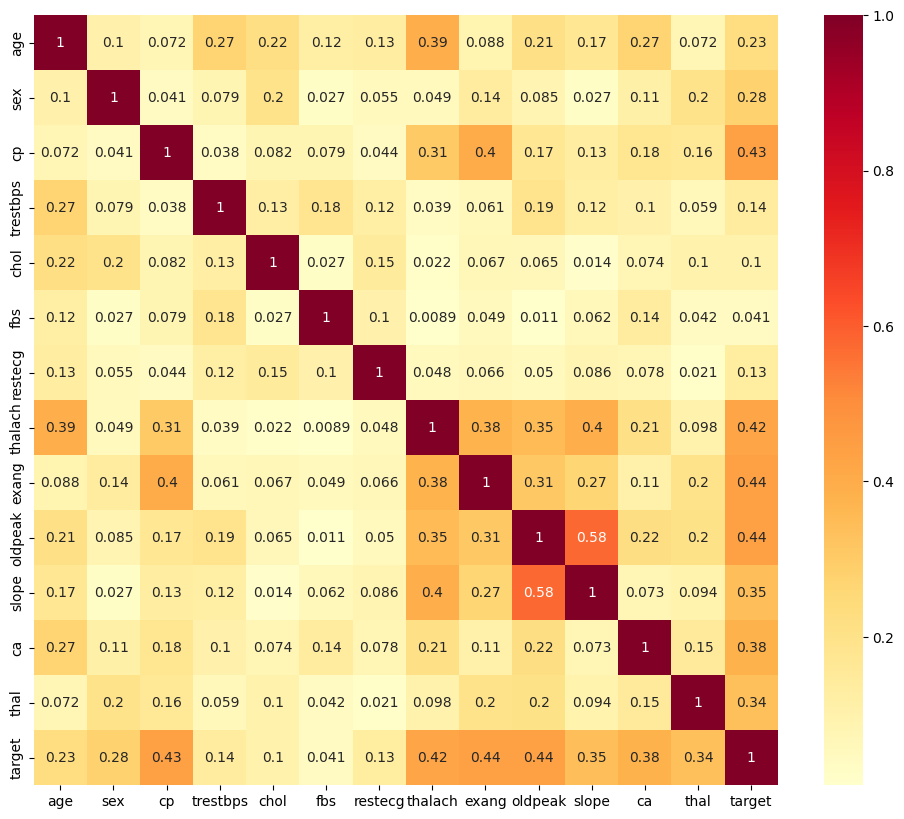

In [98]:
plt.figure(figsize=(12, 10))
sns.heatmap(abs(df.corr()), annot=True, cmap='YlOrRd')

In [ ]:
best_forest.predict_proba([])